In [1]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas_datareader.data as web
from scipy import stats
%matplotlib inline

In [3]:
start_date = datetime.datetime(2021,1,1)
end_date = datetime.datetime(2022,1,1)

In [4]:
data_1 = web.DataReader("M&M.NS", 'yahoo', start_date, end_date)
print(data_1.head())

                  High         Low   Open       Close     Volume   Adj Close
Date                                                                        
2021-01-01  744.750000  723.000000  725.0  732.450012  9543128.0  724.297668
2021-01-04  751.000000  727.250000  735.0  749.099976  4547027.0  740.762329
2021-01-05  748.000000  730.000000  748.0  740.099976  3551554.0  731.862488
2021-01-06  746.450012  730.450012  741.0  736.099976  3601608.0  727.907043
2021-01-07  755.000000  740.099976  743.0  744.400024  4063641.0  736.114685


In [5]:
data_2 = web.DataReader(name="^NSEI", data_source='yahoo', start=start_date, end=end_date)
print(data_2.head())

                    High           Low          Open         Close  Volume  \
Date                                                                         
2021-01-01  14049.849609  13991.349609  13996.099609  14018.500000  358100   
2021-01-04  14147.950195  13953.750000  14104.349609  14132.900391  495000   
2021-01-05  14215.599609  14048.150391  14075.150391  14199.500000  492500   
2021-01-06  14244.150391  14039.900391  14240.950195  14146.250000  632300   
2021-01-07  14256.250000  14123.099609  14253.750000  14137.349609  559200   

               Adj Close  
Date                      
2021-01-01  14018.500000  
2021-01-04  14132.900391  
2021-01-05  14199.500000  
2021-01-06  14146.250000  
2021-01-07  14137.349609  


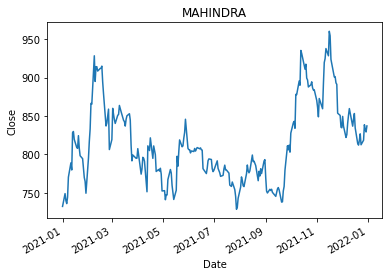

In [6]:
close = data_1['Close']
ax = close.plot(title='MAHINDRA')
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.show()

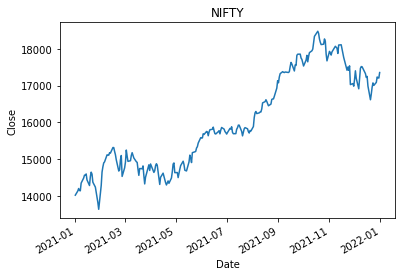

In [7]:
close = data_2['Close']
ax = close.plot(title='NIFTY')
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.show()

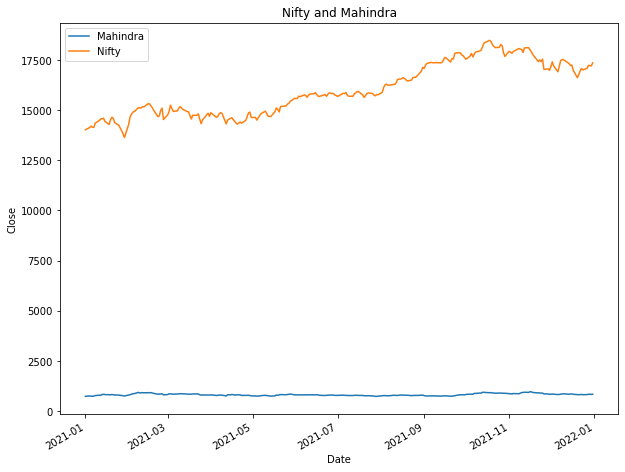

In [8]:
close_1 = data_1['Close']
ax = close_1.plot(title='Nifty and Mahindra',label='Mahindra', figsize=(10,8))
close_2 = data_2['Close']
close_2.plot(ax=ax,label='Nifty')
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.legend()

In [9]:
data_1['Cummulative']=data_1['Close']/data_1['Close'].iloc[0]
data_2['Cummulative']=data_2['Close']/data_2['Close'].iloc[0]

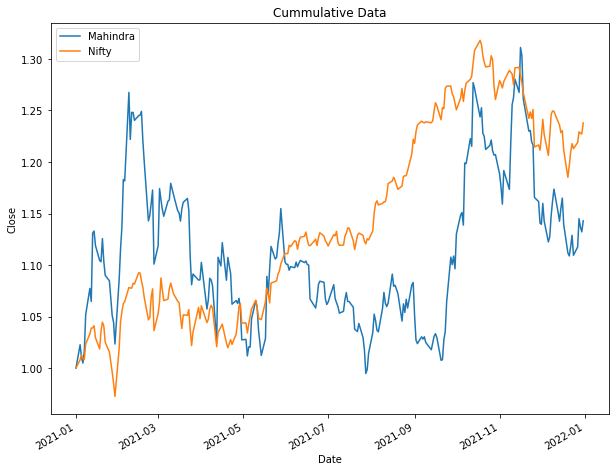

In [10]:
tat = data_1['Cummulative']
axes = tat.plot(title='Cummulative Data',label='Mahindra', figsize=(10,8))
nif = data_2['Cummulative']
nif.plot(axes=axes,label='Nifty')
axes.set_xlabel('Date')
axes.set_ylabel('Close')
plt.legend()

In [11]:
data_1['Daily_return'] = data_1['Close'].pct_change(1)
data_2['Daily_return'] = data_2['Close'].pct_change(1)

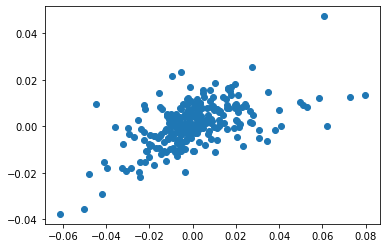

In [12]:
plt.scatter(data_1['Daily_return'], data_2['Daily_return'])

In [13]:
linear_reg = stats.linregress(data_1['Daily_return'].iloc[1:], data_2['Daily_return'].iloc[1:])
linear_reg

LinregressResult(slope=0.28689878757048065, intercept=0.0007025289508417105, rvalue=0.5740918909816681, pvalue=4.6968842190290815e-23, stderr=0.026141906286282473, intercept_stderr=0.0005161479613729546)

In [14]:
beta,alpha,r_val,p_val,std_err = linear_reg

In [15]:
beta

0.28689878757048065

In [16]:
alpha

0.0007025289508417105

In [17]:
market_return = data_2['Daily_return'].mean()*248
market_return

0.22646634346329372

In [18]:
risk_free_ret = 0.065 #gov bound return as risk free return

In [19]:
expected_ret = 1+risk_free_ret+beta*(market_return-risk_free_ret)

In [20]:
expected_ret

1.1113244981730577

In [21]:
pred_date = datetime.datetime(2022,6,6)

In [22]:
data_3 = web.DataReader('M&M.NS','yahoo',pred_date,pred_date)
data_3

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-06-06,1048.599976,1018,1028,1035.949951,3443406,1035.949951


In [23]:
actual_return=data_3['Close'].iloc[0]/data_1['Close'].iloc[0]

In [24]:
actual_return

1.4143626649009566

In [25]:
error=(actual_return-expected_ret)/expected_ret

In [26]:
error

0.27268198192883647